In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from keras.datasets import imdb
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, Dense, Activation, Embedding

import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0,maxlen=None,start_char=1,seed=13,oov_char=2,index_from=3)

In [3]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [4]:
print("X train shape: ", X_train.shape)
print("X train shape: ", X_train.shape)

X train shape:  (25000,)
X train shape:  (25000,)


**EDA**

In [5]:
unique, counts = np.unique(Y_train, return_counts=True)
print("Y train distribution: ", dict(zip(unique, counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [6]:
unique, counts = np.unique(Y_test, return_counts=True)
print("Y test distribution: ", dict(zip(unique, counts)))

Y test distribution:  {0: 12500, 1: 12500}


In [7]:
print(X_train[0])

[1, 608, 13, 6467, 14, 22, 13, 80, 1109, 14, 20, 584, 18, 231, 72, 141, 6, 783, 254, 189, 7060, 13, 100, 115, 106, 14, 20, 584, 207, 82, 557, 111, 111, 537, 7, 4, 962, 12, 69, 11, 45, 204, 766, 33, 4, 8334, 23, 94, 797, 1048, 991, 527, 1987, 538, 2629, 4, 4518, 125, 72, 449, 8295, 68, 3385, 2500, 93, 14, 1190, 22, 13, 119, 12, 13, 197, 4, 226, 22, 16, 542, 5, 221, 14, 20, 9, 38, 629, 14, 9, 4, 6128, 20, 13, 28, 126, 110, 11, 61, 113, 24, 15, 51, 571, 11, 4, 22, 5, 4, 326, 7, 4, 22, 26, 24, 629, 195, 21, 51, 210, 188, 72, 16, 21849, 2726, 116, 118, 189, 22, 126, 164, 70, 126, 30, 14, 629, 174, 2195, 829, 33, 94, 61124]


In [9]:
review_len_train = []
review_len_test = []
for i,j in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [10]:
print("Min: ", min(review_len_train), "Max: ", max(review_len_train))
print("Min: ", min(review_len_test), "Max: ", max(review_len_test))

Min:  11 Max:  2494
Min:  7 Max:  2315


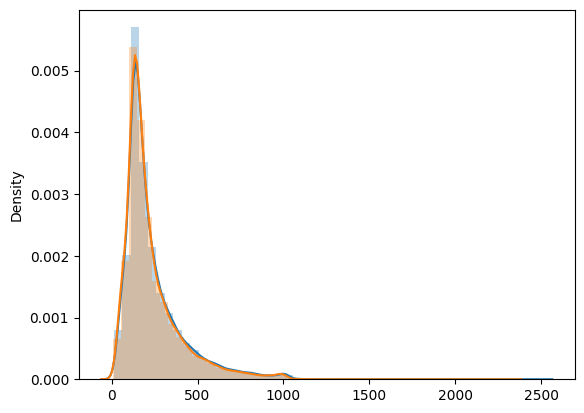

In [14]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [15]:
print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=132, count=196)


In [16]:
word_index = imdb.get_word_index()
print(type(word_index))

1641221/1641221 [==============================] - 3s 2us/step
<class 'dict'>


In [17]:
print("length of the word_index:", len(word_index))

length of the word_index: 88584


In [18]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [19]:
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay()

! this movie was extremely funny i would like to own this for my vintage collection of 1970s movie must see again list i know this cast of characters they are people that i have met over the years and that prompt me to search out this comedy unfortunately this was never put to dvd or vhs redd foxx always a clown of comedy pearl baily a great match as his wife witty and sassy norman a son with a secret not sure if he will have a future if it is out dennis dugan crazy funny man miss dobson hooker with a heart and little conscience love lust strange family ties this movie qualifies for a come back encore performance situation comedy with a mix of events as this could and should find its way as a remake i do think finding cast would be extremely difficult maybe impossible except jerry seinfeld playing dennis dugan role this earmarks a couple of seinfeld episodes that also brought me back to norman is that you keeping them in the closest was surely impossible as impossible to reform pretend

In [20]:
decoded_review = whatItSay(5)

! quite possibly how francis veber one of the best comedy directors in the world at least when sticking to his native france managed to turn in a film so completely unwatchable is beyond the reason of mere mortal man to discern it's not just that the characters are so unlikeable or that the film is so utterly devoid of even the lowest form of wit it's genuinely physically painful to watch such an endless parade of inept writing acting and film making that you cannot believe this is the work of experienced and talented filmmakers for once the near eternity spent in the cutting room and on the shelf before its blink and you'll miss it theatrical release tells the whole story what were they thinking
0


**Preprocess**

In [21]:
num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

In [22]:
maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [24]:
print("X train shape: ", X_train.shape)

X train shape:  (25000, 130)


In [25]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [26]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [27]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


**Construct RNN Model**

In [28]:
rnn = Sequential()

rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape = (num_words, maxlen), return_sequences=False, activation='relu'))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



In [32]:
history = rnn.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=5,batch_size=128,verbose=1)

Epoch 1/5
196/196 [==============================] - 6s 31ms/step - loss: 0.2215 - accuracy: 0.9141 - val_loss: 0.3481 - val_accuracy: 0.8614
Epoch 2/5
196/196 [==============================] - 6s 30ms/step - loss: 0.1958 - accuracy: 0.9238 - val_loss: 0.3413 - val_accuracy: 0.8620
Epoch 3/5
196/196 [==============================] - 6s 29ms/step - loss: 0.1745 - accuracy: 0.9338 - val_loss: 0.3645 - val_accuracy: 0.8482
Epoch 4/5
196/196 [==============================] - 6s 29ms/step - loss: 0.1578 - accuracy: 0.9428 - val_loss: 0.3607 - val_accuracy: 0.8602
Epoch 5/5
196/196 [==============================] - 6s 30ms/step - loss: 0.1400 - accuracy: 0.9478 - val_loss: 0.6629 - val_accuracy: 0.8064


In [33]:
score = rnn.evaluate(X_test, Y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.6629 - accuracy: 0.8064


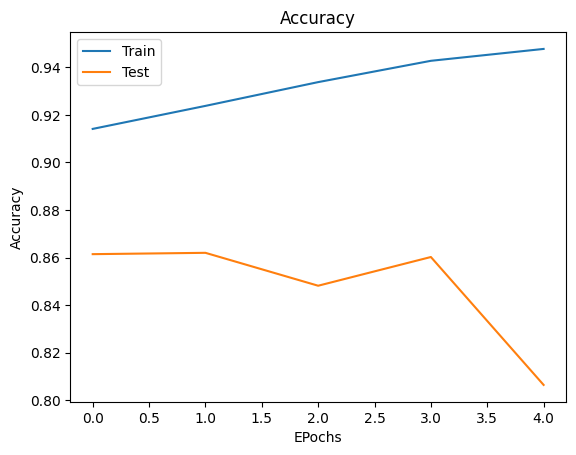

In [36]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label='Test')
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("EPochs")
plt.legend()
plt.show()

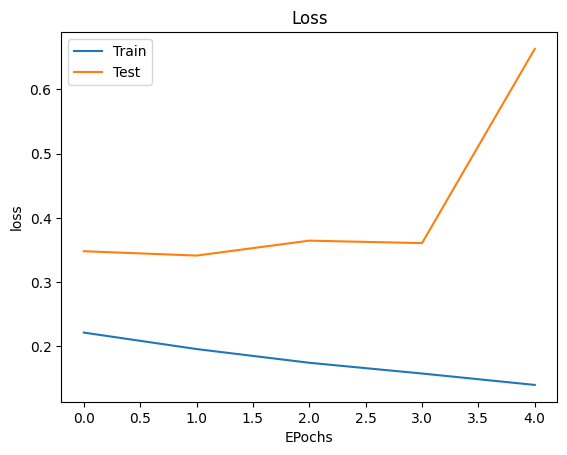

In [37]:
plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label='Test')
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("EPochs")
plt.legend()
plt.show()